In [1]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from itertools import cycle
import matplotlib.pyplot as plt

In [2]:
iris_data = datasets.load_iris()
features = iris_data.data
target = iris_data.target

Case 1:
Positive class - Setosa,
Negative Class - Versicolour and Virginica

Case 2:
Positive class - Versicolour,
Negative Class - Setosa and Virginica

Case 3:
Positive class - Virginica,
Negative Class - Versicolour and Setosa

In [3]:
features[:5, :]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
target[:5]


array([0, 0, 0, 0, 0])

In [5]:
target = label_binarize(target, classes=[0, 1, 2])
target[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [6]:
train_X, test_X,train_y, test_y = train_test_split(features,target,test_size=0.25,random_state=42)
 
model_1 = LogisticRegression(random_state=0).fit(train_X, train_y[:, 0])
model_2 = LogisticRegression(random_state=0).fit(train_X, train_y[:, 1])
model_3 = LogisticRegression(random_state=0).fit(train_X, train_y[:, 2])
 
print(f"Model Accuracy :")
print(f"model 1 - {model_1.score(test_X, test_y[:, 0])}")
print(f"model 2 - {model_2.score(test_X, test_y[:, 1])}")
print(f"model 3 - {model_3.score(test_X, test_y[:, 2])}")

Model Accuracy :
model 1 - 1.0
model 2 - 0.7368421052631579
model 3 - 1.0


In [7]:
model = OneVsRestClassifier(LogisticRegression(random_state=0)).fit(train_X, train_y)
prob_test_vec = model.predict_proba(test_X)
n_classes = 3
fpr = [0] * 3
tpr = [0] * 3
thresholds = [0] * 3
auc_score = [0] * 3
 
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(test_y[:, i],prob_test_vec[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
 
auc_score

[1.0, 0.8047138047138047, 1.0]

In [8]:
sum(auc_score) / n_classes

0.9349046015712682

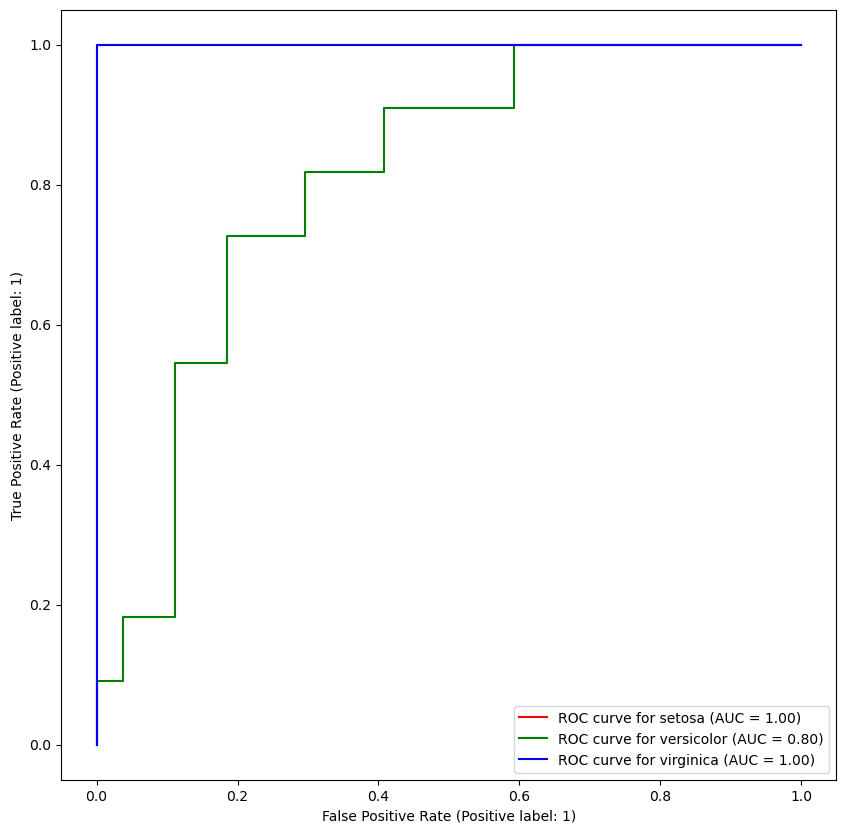

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
target_names = iris_data.target_names
colors = cycle(["red", "green", "blue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        test_y[:, class_id],
        prob_test_vec[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax
    )